# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

plt.rcParams.update({'font.size': 15})

In [2]:
# Searborn bar annotate function
def annotate_bar(ax):
    for bar in ax.patches: 

      # Using Matplotlib's annotate function and 
      # passing the coordinates where the annotation shall be done 
      # x-coordinate: bar.get_x() + bar.get_width() / 2 
      # y-coordinate: bar.get_height() 
      # free space to be left to make graph pleasing: (0, 8) 
      # ha and va stand for the horizontal and vertical alignment 
        ax.annotate(format(bar.get_height(), '.2f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 8), 
                       textcoords='offset points') 

In [3]:
df3 = pd.read_csv('UK Datasets/ar-2005-2009-xlsb.csv')
df2 = pd.read_csv('UK Datasets/ar-2010-2014-xlsb.csv')
df1 = pd.read_csv('UK Datasets/ar-2015-2016-xlsb.csv')


# df = pd.concat([df1, df2, df3], axis=0)
df = df1

/Users/arash/opt/anaconda3/envs/streamlit/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,8,9,11,29,32,43,48,50,51,52,54,83,89,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/arash/opt/anaconda3/envs/streamlit/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,9,29,31,32,43,48,49,50,51,53,54,59,60,77,83,89,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/arash/opt/anaconda3/envs/streamlit/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,29,31,32,43,48,50,51,52,53,54,77,83,89,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.shape)
df.head()

(158519, 95)


,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 34,NaN,5,5,5,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Patient Age at Treatment',
       'Date patient started trying to become pregnant OR date of last pregnancy',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease'

# Select columns and shorten the names


In [6]:
cols = {'Patient Age at Treatment':'age',
       'Total Number of Previous IVF cycles':'nr_prev_ivf',
       'Total number of IVF pregnancies': 'nr_ivf_preg',
       'Total number of live births - conceived through IVF': 'nr_ivf_live_birth',
       'Type of Infertility - Female Primary': 'female_primary',
       'Type of Infertility - Female Secondary': 'female_secondary',
       'Type of Infertility - Male Primary': 'male_primary',
       'Type of Infertility - Male Secondary': 'male_secondary',
       'Type of Infertility -Couple Primary': 'couple_primary',
       'Type of Infertility -Couple Secondary': 'couple_secondary',
       'Cause  of Infertility - Tubal disease': 'cause_tubal',
       'Cause of Infertility - Ovulatory Disorder': 'cause_ovulatory',
       'Cause of Infertility - Male Factor': 'cause_male',
       'Cause of Infertility - Patient Unexplained': 'cause_unexplained',
       'Cause of Infertility - Endometriosis': 'cause_endometriosis',
       'Cause of Infertility - Cervical factors': 'cause_cervical',
       'Cause of Infertility - Female Factors': 'cause_female',
       'Cause of Infertility - Partner Sperm Concentration': 'cause_sperm_concentrate',
       'Cause of Infertility -  Partner Sperm Morphology': 'cause_sperm_morph',
       'Causes of Infertility - Partner Sperm Motility': 'cause_sperm_mobility',
       'Cause of Infertility -  Partner Sperm Immunological factors': 'cause_sperm_immun', 
       'Main Reason for Producing Embroys Storing Eggs': 'reason_storing_egg',
       'Stimulation used': 'is_stimul',
       'Type of Ovulation Induction': 'ovul_induc',
       'Egg Donor Age at Registration': 'egg_donor_age',
       'Sperm Donor Age at Registration': 'sperm_donor_age',
       'Donated embryo': 'donated_embryo',
       'Specific treatment type': 'treat_type',
       'PGD': 'pgd',
       'PGS': 'pgs',
       'Elective Single Embryo Transfer': 'elec_single_embryo_trans',
       'Egg Source': 'egg_source',
       'Sperm From': 'sperm_source',
       'Fresh Eggs Collected': 'fresh_egg_collected',
       'Fresh Eggs Stored': 'fresh_egg_stored',
       'Total Eggs Mixed': 'total_egg_mixed',
       'Fresh Cycle': 'fresh_cycle', 
       'Frozen Cycle': 'frozen_cycle',
       'Eggs Mixed With Partner Sperm': 'eggs_mixed_partner_sperm',
       'Total Embryos Created': 'tot_embryo',
       'Embryos Transfered': 'embryos_transfered',
       'Live Birth Occurrence': 'is_live_birth',
       'Number of Live Births': 'nr_live_birth',
       'Early Outcome': 'early_outcome'}

In [7]:
df_cols = df[cols].rename(columns=cols)
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158519 entries, 0 to 158518
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       158519 non-null  object 
 1   nr_prev_ivf               158519 non-null  object 
 2   nr_ivf_preg               158519 non-null  object 
 3   nr_ivf_live_birth         158519 non-null  int64  
 4   female_primary            158519 non-null  int64  
 5   female_secondary          158519 non-null  int64  
 6   male_primary              158519 non-null  int64  
 7   male_secondary            158519 non-null  int64  
 8   couple_primary            158519 non-null  int64  
 9   couple_secondary          158519 non-null  int64  
 10  cause_tubal               158519 non-null  int64  
 11  cause_ovulatory           158519 non-null  int64  
 12  cause_male                158519 non-null  int64  
 13  cause_unexplained         158519 non-null  i

In [8]:
df_cols['treat_type'].unique()

array(['IVF', 'ICSI', 'Unknown', 'IVF:IVF', 'ICSI:ICSI', 'IVF:Unknown',
       'ICSI:Unknown', 'ICSI:IVF', 'ICSI / BLASTOCYST ', 'IVF:ICSI',
       'ICSI / AH', 'FER', 'IVF / AH', 'IVF / BLASTOCYST',
       'IVF:Unknown:Unknown:Unknown', 'IUI', 'Generic DI', 'IVI', 'ICI'],
      dtype=object)

# Preprocessing

is_live_birth has 1 or Nan. Replace the Nan with zero since it means an unsuccesful cycle and it's easier to deal with

In [9]:
df_cols.is_live_birth = df_cols.is_live_birth.fillna(0)
df_cols.is_live_birth.unique()

array([1., 0.])

## Label encoding - object to int conversion

In [10]:
# Label encoding: convert from string to int, replace the >5 with 6 
df_cols.nr_ivf_preg = df_cols.nr_ivf_preg.replace({'>=5':6})
df_cols.nr_ivf_preg = df_cols.nr_ivf_preg.astype(int)
df_cols.nr_ivf_preg.unique()

array([0, 1, 2, 4, 3, 5, 6])

In [11]:
# Label encoding: convert from string to int, replace the >5 with 6 
df_cols.nr_prev_ivf = df_cols.nr_prev_ivf.replace({'>=5':6})
df_cols.nr_prev_ivf = df_cols.nr_prev_ivf.astype(int)
df_cols.nr_prev_ivf.unique()

array([2, 3, 0, 5, 4, 1, 6])

In [12]:
# convert the fresh_egg_collected from string to int, replace the >50 with 51
df_cols.fresh_egg_collected = df_cols.fresh_egg_collected.replace({'> 50':51})
df_cols.fresh_egg_collected = df_cols.fresh_egg_collected.astype(float)

# convert the tot_embryo from string to int, replace the >50 with 51
df_cols.tot_embryo = df_cols.tot_embryo.replace({'> 50':51})
df_cols.tot_embryo = df_cols.tot_embryo.astype(float)

In [13]:
# convert the tot_embryo from string to int, replace the >50 with 51
df_cols.total_egg_mixed = df_cols.total_egg_mixed.replace({'> 50':51})
df_cols.total_egg_mixed = df_cols.total_egg_mixed.astype(float)

df_cols.total_egg_mixed.unique()

array([ 0.,  3.,  4.,  6.,  1., 13.,  8., 11., 10.,  7., 15.,  9., 21.,
        2., 17., 12.,  5., 16., 33., 14., 24., 20., 23., 19., 18., 22.,
       27., 25., 26., 47., 51., 28., 36., 29., 38., 34., 30., 32., 37.,
       31., 43., 42., 35., 46., 45., 41., 48., 39., 40., 49., 44., 50.,
       nan])

In [14]:
# Label encoding: convert from string to int, replace the >5 with 6 
df_cols.eggs_mixed_partner_sperm = df_cols.eggs_mixed_partner_sperm.replace({'> 50':51})
df_cols.eggs_mixed_partner_sperm = df_cols.eggs_mixed_partner_sperm.astype(float)
df_cols.eggs_mixed_partner_sperm.unique()

array([ 0.,  3.,  4.,  1., 13.,  8., 11., 10.,  7., 15.,  9.,  6.,  2.,
       17., 12.,  5., 16., 33., 14., 24., 21., 23., 19., 18., 20., 22.,
       25., 26., 27., 47., 51., 28., 36., 29., 38., 34., 30., 37., 31.,
       43., 32., 42., 35., 46., 45., 41., 48., 39., 40., 49., 44., 50.,
       nan])

# What percentage the main cause of infertility is female vs. male vs. couple?

In [15]:
print('Main cause of infertility due to:')
print('Female:', df_cols.female_primary.sum())
print('Male:', df_cols.male_primary.sum())
print('Secondary cause of infertility due to:')
print('Female:', df_cols.female_secondary.sum())
print('Male:', df_cols.male_secondary.sum())
print('Primary cause of infertility due to:')
print('Couple:', df_cols.couple_primary.sum())
print('Secondary cause of infertility due to:')
print('Couple:', df_cols.couple_secondary.sum())


Main cause of infertility due to:
Female: 555
Male: 519
Secondary cause of infertility due to:
Female: 228
Male: 228
Primary cause of infertility due to:
Couple: 590
Secondary cause of infertility due to:
Couple: 162


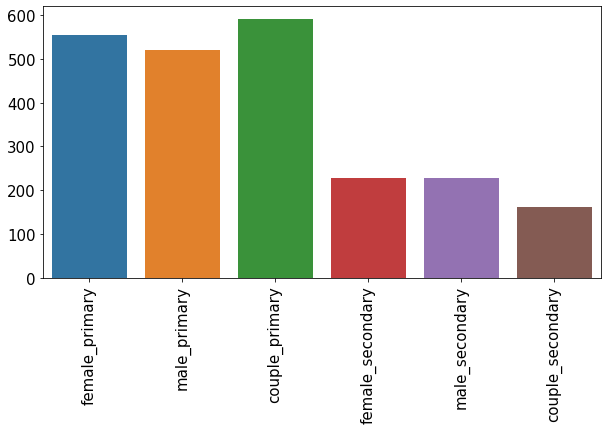

In [16]:
data = df_cols[['female_primary', 'male_primary', 'couple_primary', 
                'female_secondary', 'male_secondary', 'couple_secondary']].sum()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=data.index, y=data)
ax.tick_params(axis='x', labelrotation=90)

# Infertility causes

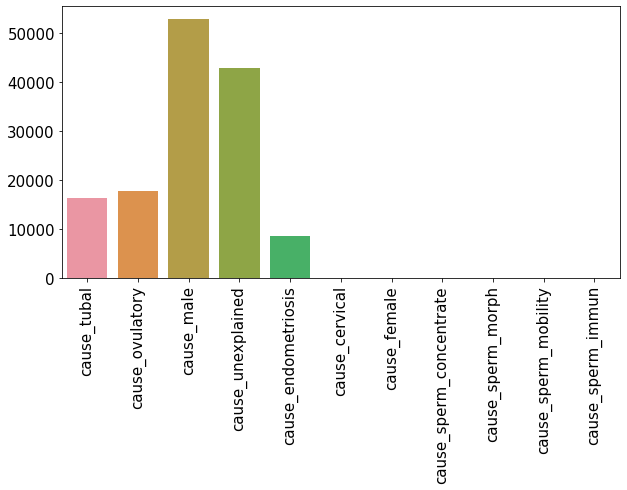

In [17]:
data = df_cols[['cause_tubal', 'cause_ovulatory', 'cause_male', 'cause_unexplained',
                'cause_endometriosis', 'cause_cervical', 'cause_female', 'cause_sperm_concentrate',
               'cause_sperm_morph', 'cause_sperm_mobility', 'cause_sperm_immun']].sum()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x= data.index, y=data)
ax.tick_params(axis='x', labelrotation=90)

# Egg source

Text(0.5, 1.0, 'Egg Source')

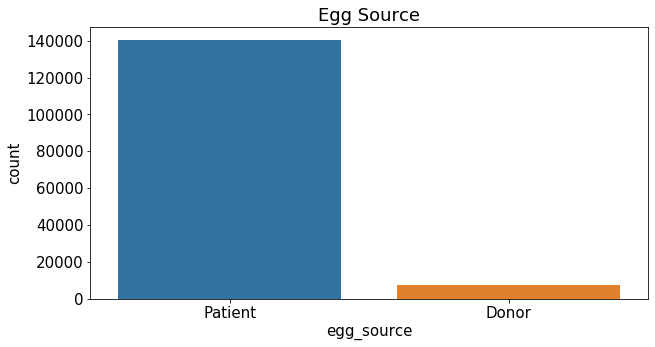

In [18]:
df_cols['egg_source'].unique()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(df_cols.egg_source)
ax.set_title('Egg Source')

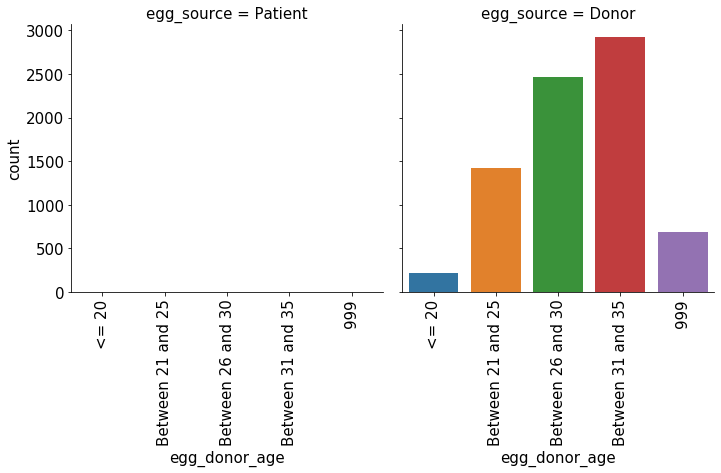

In [19]:
order = ['<= 20', 'Between 21 and 25', 'Between 26 and 30', 'Between 31 and 35', '999']
g = sns.catplot(data=df_cols, x='egg_donor_age', col='egg_source', 
                kind='count', order=order, height=5)
g.set_xticklabels(rotation=90)

# Sperm source

Text(0.5, 1.0, 'Sperm Source')

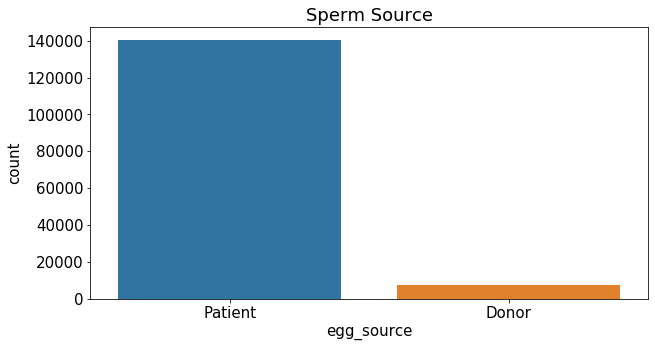

In [20]:
df_cols['sperm_source'].unique()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(df_cols.egg_source)
ax.set_title('Sperm Source')

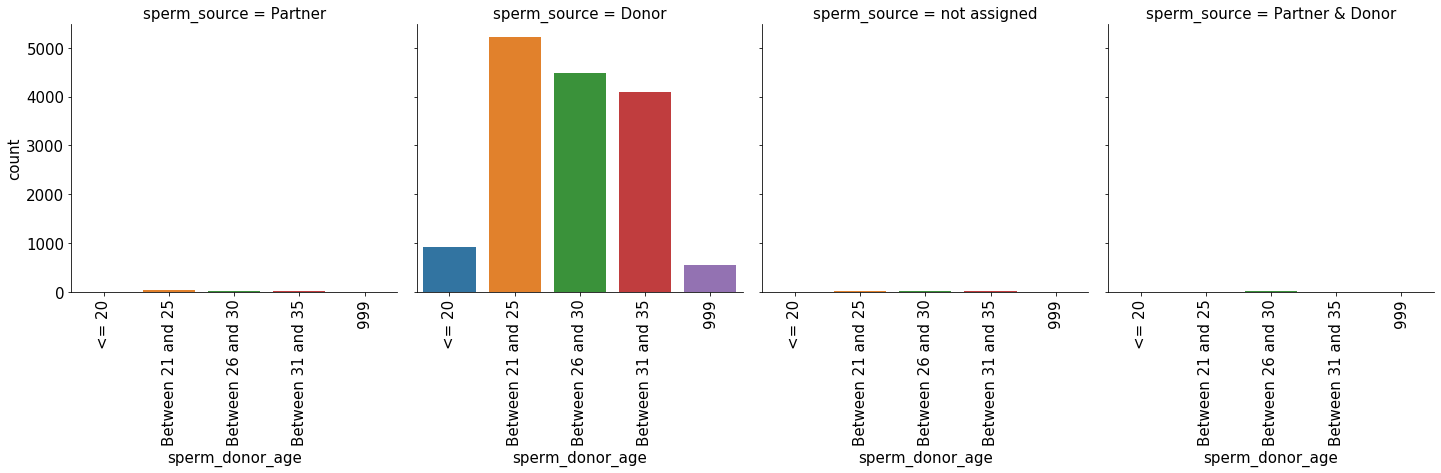

In [21]:
order = ['<= 20', 'Between 21 and 25', 'Between 26 and 30', 'Between 31 and 35', '999']
g = sns.catplot(data=df_cols, x='sperm_donor_age', col='sperm_source', 
                kind='count', order=order, height=5)
g.set_xticklabels(rotation=90)

# Donated embryo

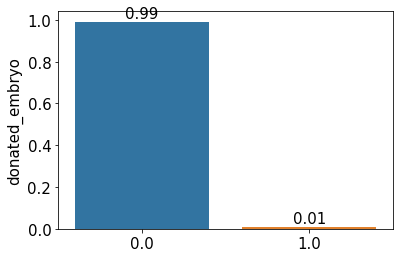

In [22]:
data = df_cols.donated_embryo.value_counts(normalize=True)
ax = sns.barplot(x= data.index, y=data)
annotate_bar(ax)

# Fresh Eggs

We should convert the fresh_egg_collected from string to int, and replace the >50 with 1000.
We should select the rows where the egg source is patient and cycle is fresh. Also, since in IUI, egg is not retrieved. It's better to look at IVF and ICSI treatments only

Mean of fresh egg collected: 9.56
Median of fresh egg collected: 8.0


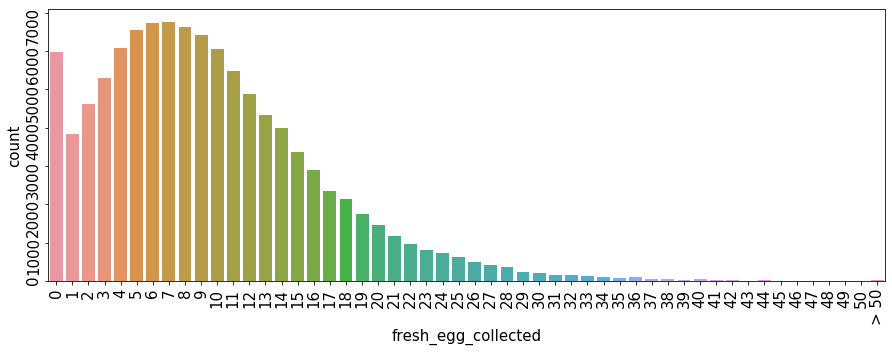

In [23]:
# select the rows where the egg source is patient and cycle is a fresh_cycle
df_fresh = df_cols.loc[(df_cols.fresh_cycle==1) & (df_cols.egg_source=='Patient')]
data = df_fresh.fresh_egg_collected
xlabel = [str(i) for i in np.arange(51)]
xlabel.append('> 50')

print('Mean of fresh egg collected:', round(data.mean(), 2))
print('Median of fresh egg collected:', data.median())

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(data)
ax.tick_params(rotation=90)
ax.set_xticklabels(xlabel);

Text(0.5, 1.0, 'Boxplot fresh collected eggs per age group')

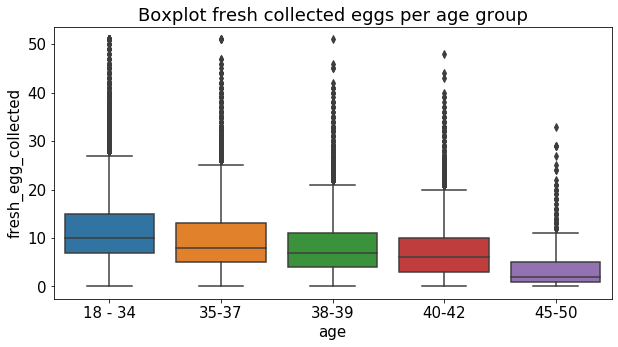

In [24]:
order = ['18 - 34', '35-37', '38-39', '40-42', '45-50']
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='age', y='fresh_egg_collected', data=df_fresh[df_fresh.age!='999'], order=order)
ax.set_title('Boxplot fresh collected eggs per age group')

Text(0.5, 1.0, 'Average of fresh collected eggs per age group')

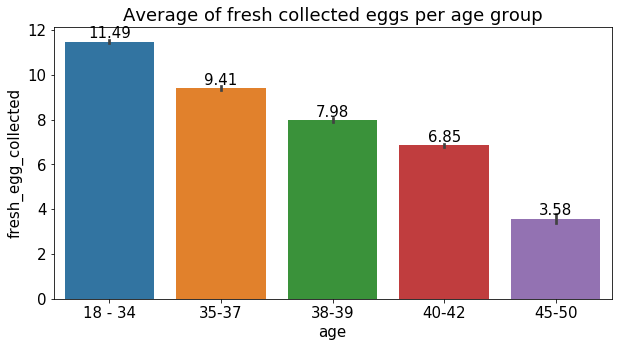

In [25]:
order = ['18 - 34', '35-37', '38-39', '40-42', '45-50']
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='age', y='fresh_egg_collected', data=df_fresh[df_fresh.age!='999'], order=order, estimator=np.mean)
annotate_bar(ax)
ax.set_title('Average of fresh collected eggs per age group')

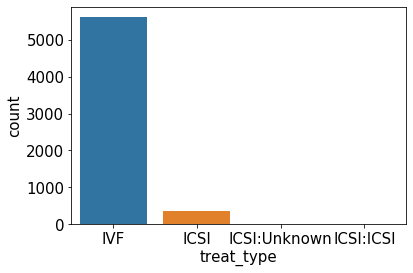

In [26]:
sns.countplot(df_fresh[df_fresh.fresh_egg_collected==0].treat_type)

# Total embryos created

Mean of total embryos collected: 5.15
Median of total embryos collected: 4.0


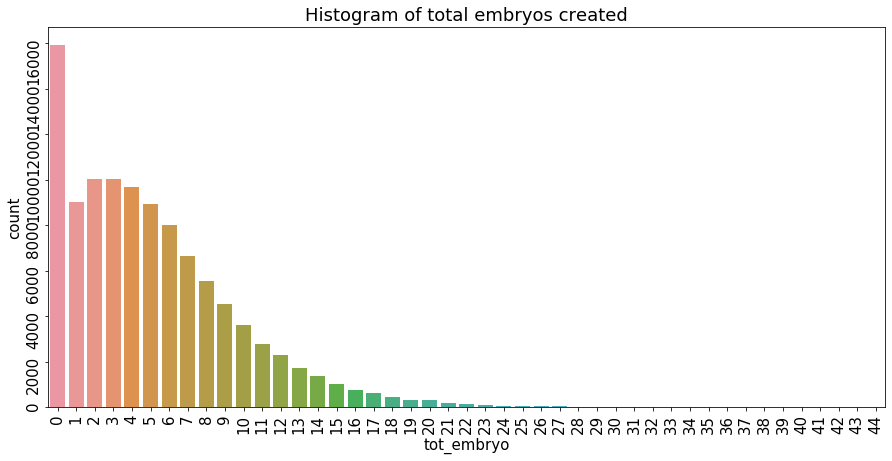

In [27]:
data = df_fresh.tot_embryo
xlabel = [str(i) for i in np.arange(45)]
xlabel.append('> 50')

print('Mean of total embryos collected:', round(data.mean(), 2))
print('Median of total embryos collected:', data.median())

fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.countplot(data)
ax.tick_params(rotation=90)
ax.set_xticklabels(xlabel);
ax.set_title('Histogram of total embryos created');

# Treatment types

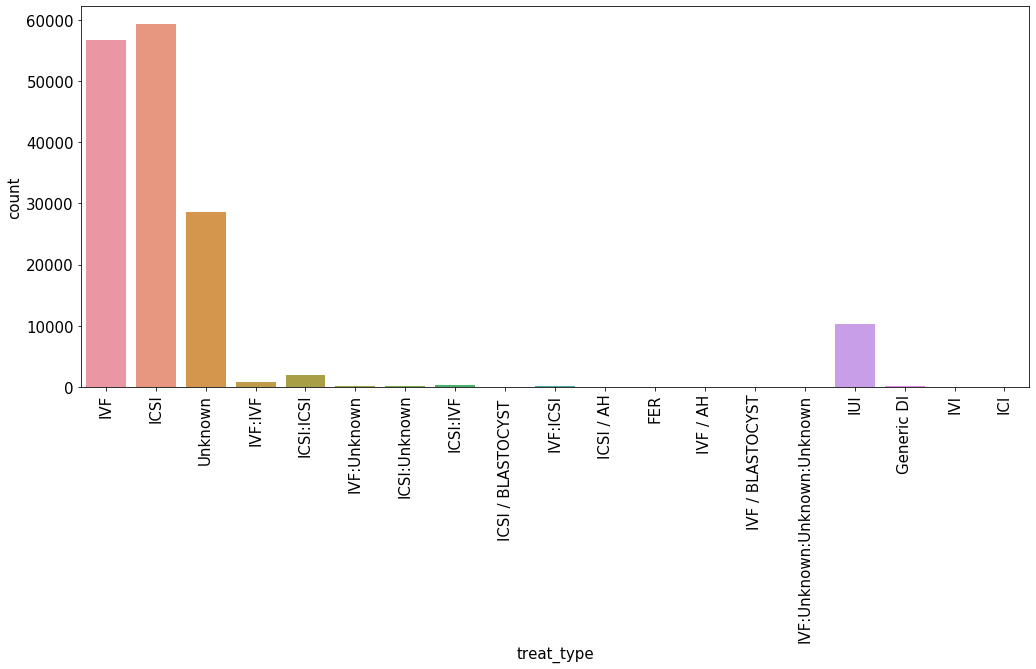

In [28]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.countplot(x='treat_type', data=df_cols, ax=ax)
ax.tick_params(axis='x', labelrotation=90)

# Early outcome

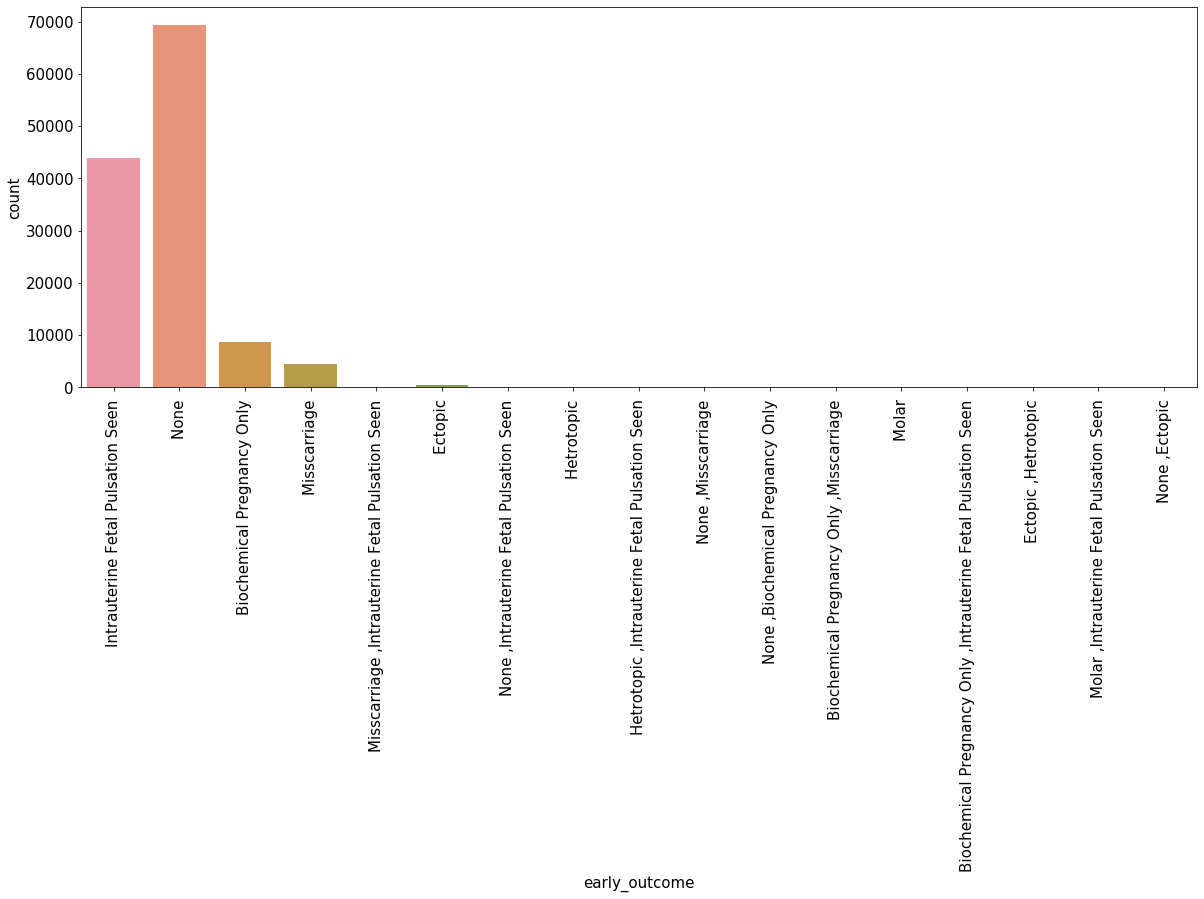

In [29]:
fig, ax = plt.subplots(figsize=(20,7))
ax = sns.countplot(df_cols.early_outcome)
ax.tick_params(axis='x', labelrotation=90)

# Live birth 

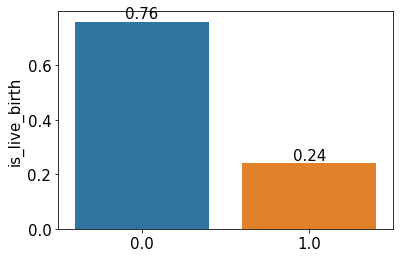

In [30]:
data = df_cols.is_live_birth.value_counts(normalize=True)
ax = sns.barplot(x= data.index, y=data)
annotate_bar(ax)

## Live birth and number of fresh eggs collected

To analyze the correlation between live birth and number of fresh eggs collected, we need to extract the cycles that are indicted to for 'Treatment Now" and not for storage

In [31]:
df_fresh_treat = df_fresh[df_fresh['reason_storing_egg'].dropna().str.contains('Treatment Now')]

Mean of fresh collected eggs in successful cycles: 11.05
Mean of fresh collected eggs in unsuccessful cycles: 8.72


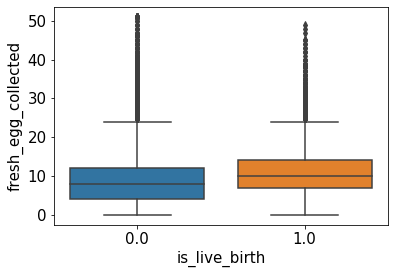

In [32]:
sns.boxplot(x='is_live_birth', y='fresh_egg_collected', data=df_fresh_treat)
print('Mean of fresh collected eggs in successful cycles:', 
      round(df_fresh_treat[df_fresh_treat.is_live_birth==1].fresh_egg_collected.mean(),2))
print('Mean of fresh collected eggs in unsuccessful cycles:', 
      round(df_fresh_treat[df_fresh_treat.is_live_birth==0].fresh_egg_collected.mean(),2))

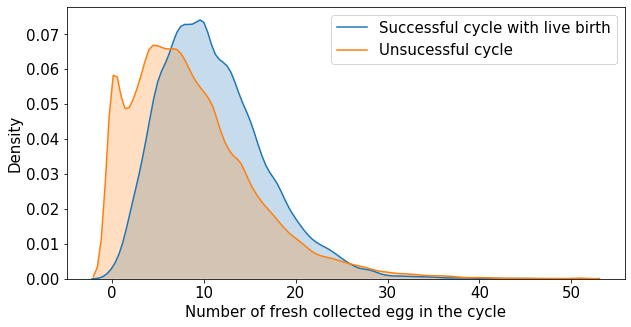

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==1].fresh_egg_collected, shade=True)
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==0].fresh_egg_collected, shade=True)
ax.legend(['Successful cycle with live birth', 'Unsucessful cycle'])
ax.set_xlabel('Number of fresh collected egg in the cycle');
ax.set_ylabel('Density');

## Live birth and total number of embryos created

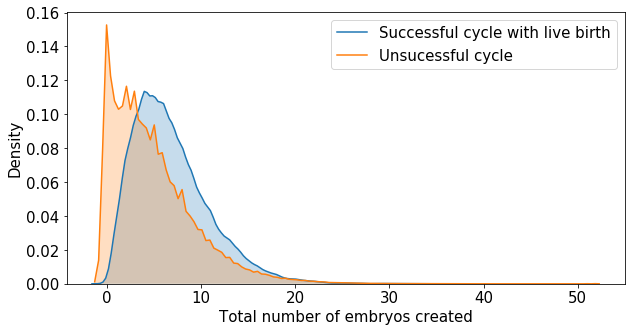

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==1].tot_embryo, shade=True)
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==0].tot_embryo, shade=True)
ax.legend(['Successful cycle with live birth', 'Unsucessful cycle'])
ax.set_xlabel('Total number of embryos created');
ax.set_ylabel('Density');

# IUI

Probability of pregnancy with IUI: 15.97 %
Probability of twin if pregnant: 13.46 %


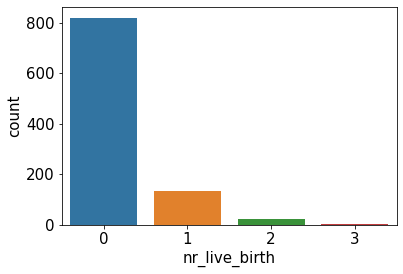

In [35]:
iui_all = df_cols.loc[(df_cols.treat_type=='IUI') & (df_cols.age =='35-37') & (df_cols.is_stimul==1)]
sns.countplot(iui_all.nr_live_birth)
    

probs = iui_all.nr_live_birth.value_counts(normalize=True)*100
prob_twin_if_preg = probs[2]/(100 - probs[0])
print(f'Probability of pregnancy with IUI: {(100 - probs[0]):0.2f} %')
print(f'Probability of twin if pregnant: {prob_twin_if_preg * 100:0.2f} %')

# Modeling 

We can build two types of model:

- Before the patient starts the IVF process based on the prior knowledge we have. 
- After the patient starts the IVF for example after the embryo transfer. 


## Filtering

### Look at the non-fresh cycles

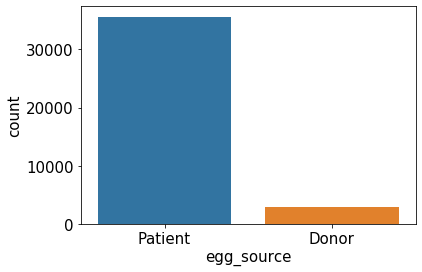

In [76]:
sns.countplot(df_cols.loc[(df_cols.fresh_cycle==0)].egg_source)

### Select the fresh cycles where the egg is from the patient for now

In [36]:
# select the rows where the egg source is patient and cycle is a fresh_cycle
df_fresh = df_cols.loc[(df_cols.fresh_cycle==1) & (df_cols.egg_source=='Patient')]

### Select the IVF and ICSI patients
Predicting the IVF success for IVF and ICSI patients. Select the IVF and ICSI patients first.

In [37]:
df_fresh['treat_type'].unique()

array(['ICSI', 'IVF', 'IVF:IVF', 'ICSI:ICSI', 'IVF:Unknown',
       'ICSI:Unknown', 'ICSI:IVF', 'IVF:ICSI', 'FER', 'ICSI / AH',
       'ICSI / BLASTOCYST ', 'IVF / BLASTOCYST'], dtype=object)

In [38]:
ivf_or_icsi = df_fresh['treat_type'].str.contains('IVF') | df_fresh['treat_type'].str.contains('ICSI') 
df_ivf = df_fresh[ivf_or_icsi]
df_ivf.shape

(104742, 44)

### Select the 'Treatment Now'

We also need to remove the patients who are doing the treatment to store eggs only and keep the 'Treatment Now'

In [39]:
df_ivf['reason_storing_egg'].unique()

array(['Treatment Now ', 'For Storing Eggs ', 'For Storing Embryos ',
       'For Donation ', 'Treatment Now ,For Donation ',
       'For Donation ,For Storing Eggs ',
       'Treatment Now ,For Storing Embryos ',
       'For Donation ,For Storing Embryos ',
       'Treatment Now ,For Donation ,For Storing Embryos ',
       'For Storing Embryos ,For Storing Eggs ,For Research ',
       'For Storing Embryos ,For Storing Eggs ',
       'Treatment Now ,For Research '], dtype=object)

In [40]:
df_ivf = df_ivf[df_ivf['reason_storing_egg'].dropna().str.contains('Treatment Now')]
df_ivf.shape

(90173, 44)

## Encoding the objects

 ### Patient's age
 Label encoding the age groups. The age group is an order category

In [41]:
le = preprocessing.LabelEncoder()
le.fit(df_ivf.age)
print(le.classes_)

# make a new column for label encoded of age
df_ivf.insert(0, 'age_le', le.transform(df_ivf.age))
df_ivf.drop(columns='age', inplace=True)

['18 - 34' '35-37' '38-39' '40-42' '43-44' '45-50']


### Sperm source

In [42]:
le = preprocessing.LabelEncoder()
le.fit(df_ivf.sperm_source)
print(le.classes_)

# make a new column for label encoded of age
df_ivf['sperm_source_le'] = le.transform(df_ivf.sperm_source)
df_ivf.drop(columns='sperm_source', inplace=True)

df_ivf['sperm_source_le'].unique()

['Donor' 'Partner' 'Partner & Donor' 'not assigned']


array([1, 0, 3, 2])

In [43]:
# # Replace the 'Patient' and 'Donor' with 1 and 0 
# df_ivf = pd.concat([df_ivf, pd.get_dummies(df_ivf.egg_source, prefix='egg')], axis=1)
# df_ivf.drop(['egg_source'], axis=1, inplace=True)

## Feature selection

In [44]:
# df_cols.columns
df_ivf.columns

Index(['age_le', 'nr_prev_ivf', 'nr_ivf_preg', 'nr_ivf_live_birth',
       'female_primary', 'female_secondary', 'male_primary', 'male_secondary',
       'couple_primary', 'couple_secondary', 'cause_tubal', 'cause_ovulatory',
       'cause_male', 'cause_unexplained', 'cause_endometriosis',
       'cause_cervical', 'cause_female', 'cause_sperm_concentrate',
       'cause_sperm_morph', 'cause_sperm_mobility', 'cause_sperm_immun',
       'reason_storing_egg', 'is_stimul', 'ovul_induc', 'egg_donor_age',
       'sperm_donor_age', 'donated_embryo', 'treat_type', 'pgd', 'pgs',
       'elec_single_embryo_trans', 'egg_source', 'fresh_egg_collected',
       'fresh_egg_stored', 'total_egg_mixed', 'fresh_cycle', 'frozen_cycle',
       'eggs_mixed_partner_sperm', 'tot_embryo', 'embryos_transfered',
       'is_live_birth', 'nr_live_birth', 'early_outcome', 'sperm_source_le'],
      dtype='object')

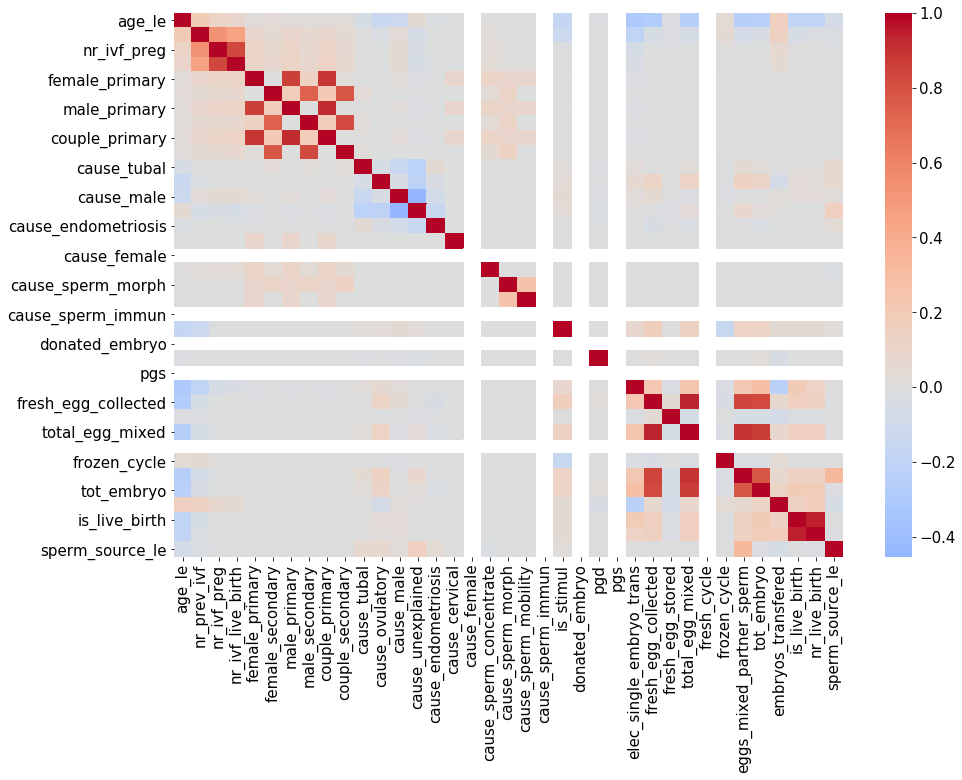

In [45]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_ivf.corr(), cmap='coolwarm', center=0)

In [46]:
abs(df_ivf.corr().is_live_birth).nlargest(15)

is_live_birth               1.000000
nr_live_birth               0.944989
age_le                      0.201712
tot_embryo                  0.197543
elec_single_embryo_trans    0.194349
total_egg_mixed             0.161840
fresh_egg_collected         0.155539
embryos_transfered          0.146234
eggs_mixed_partner_sperm    0.143656
is_stimul                   0.054417
nr_prev_ivf                 0.045769
cause_male                  0.035296
cause_ovulatory             0.031772
fresh_egg_stored            0.023928
sperm_source_le             0.015228
Name: is_live_birth, dtype: float64

In [47]:
cols_all = ['age_le', 'nr_prev_ivf', 'nr_ivf_preg', 'nr_ivf_live_birth',
       'female_primary', 'female_secondary', 'male_primary', 'male_secondary',
       'couple_primary', 'couple_secondary', 'cause_tubal', 'cause_ovulatory',
       'cause_male', 'cause_unexplained', 'cause_endometriosis',
       'cause_cervical', 'cause_sperm_concentrate',
       'cause_sperm_morph', 'cause_sperm_mobility',
       'is_stimul', 'pgd', 
       'elec_single_embryo_trans', 'sperm_source_le',
       'fresh_egg_collected', 'total_egg_mixed',
       'frozen_cycle', 'eggs_mixed_partner_sperm', 'tot_embryo',
       'embryos_transfered', 'is_live_birth']


# features selected by RFE
cols_before_ivf_rfe = ['age_le', 'is_live_birth', 'sperm_source_le'
                ]


cols_before_ivf = ['age_le', 'cause_ovulatory', 'cause_male','nr_prev_ivf', 'is_stimul', 'is_live_birth', 
                   'sperm_source_le'
                ]


cols_after_ivf = ['age_le', 'is_stimul', 'fresh_egg_collected', 'nr_prev_ivf', 'embryos_transfered',
                   'elec_single_embryo_trans', 'tot_embryo', 'is_live_birth'
                 ]

cols_after_ivf_rfe = ['age_le', 'embryos_transfered', 'tot_embryo', 'is_live_birth']

# cols_after_ivf = ['age_le', 'is_stimul', 'fresh_egg_collected', 'nr_prev_ivf', 'total_egg_mixed',
#                 'embryos_transfered', 'eggs_mixed_partner_sperm', 'cause_male', 'cause_ovulatory',
#                    'elec_single_embryo_trans', 'tot_embryo', 'is_live_birth', 'sperm_source_le'
#                  ]




In [48]:
# select after or before IVF cols

# cols_model = cols_all
# cols_model = cols_before_ivf_rfe
# cols_model = cols_before_ivf
cols_model = cols_after_ivf_rfe
# cols_model = cols_after_ivf


In [49]:
df_ivf_cols = df_ivf[cols_model].copy()
df_ivf_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90173 entries, 1 to 148105
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_le              90173 non-null  int64  
 1   embryos_transfered  90173 non-null  float64
 2   tot_embryo          90173 non-null  float64
 3   is_live_birth       90173 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.4 MB


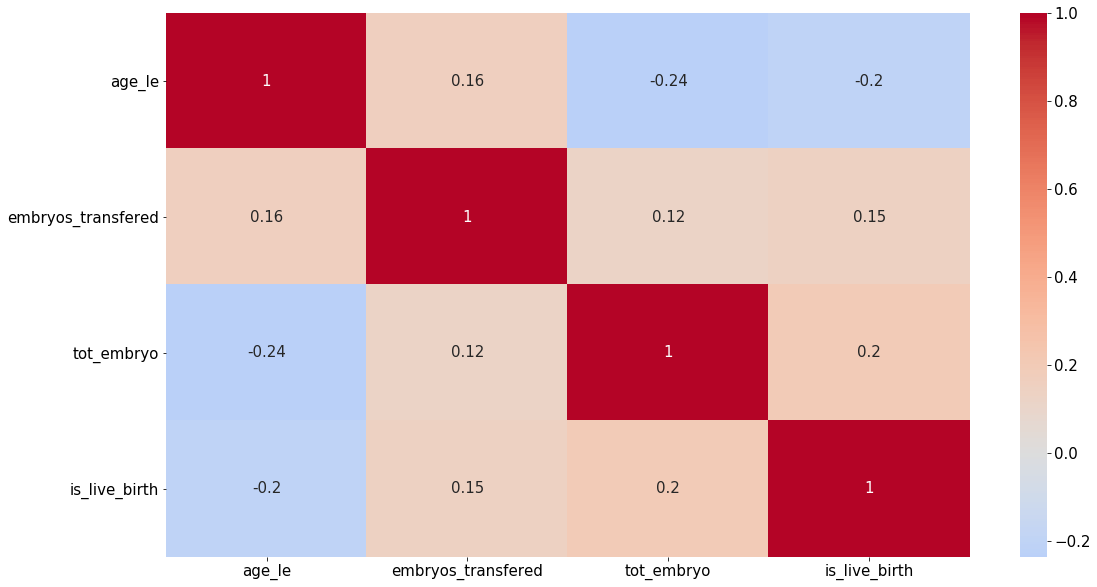

In [50]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_ivf_cols.corr(), cmap='coolwarm', annot=True, center=0)

## Check missing data

## Check skewness

In [51]:
df_ivf_cols.is_live_birth.skew()

1.0659305808628763

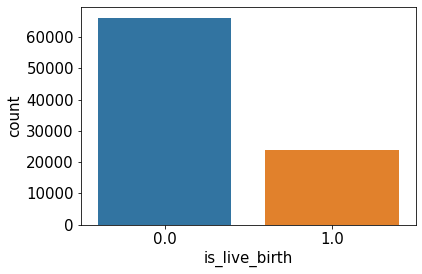

In [52]:
sns.countplot(df_ivf_cols.is_live_birth)

### Balance the dataset

Among the class 0, randomly select as many rows as class 1.

In [53]:
one_class_len = len(df_ivf_cols[df_ivf_cols.is_live_birth==1])

ratio = 1

df_ivf_class0 = df_ivf_cols[df_ivf_cols.is_live_birth==0].sample(int(ratio * one_class_len))
df_ivf_class1 = df_ivf_cols[df_ivf_cols.is_live_birth==1]
df_ivf_balanced = pd.concat([df_ivf_class0, df_ivf_class1], axis=0)

df_ivf_balanced.reset_index(drop=True, inplace=True)
df_ivf_balanced.shape

(47762, 4)

## Normalization

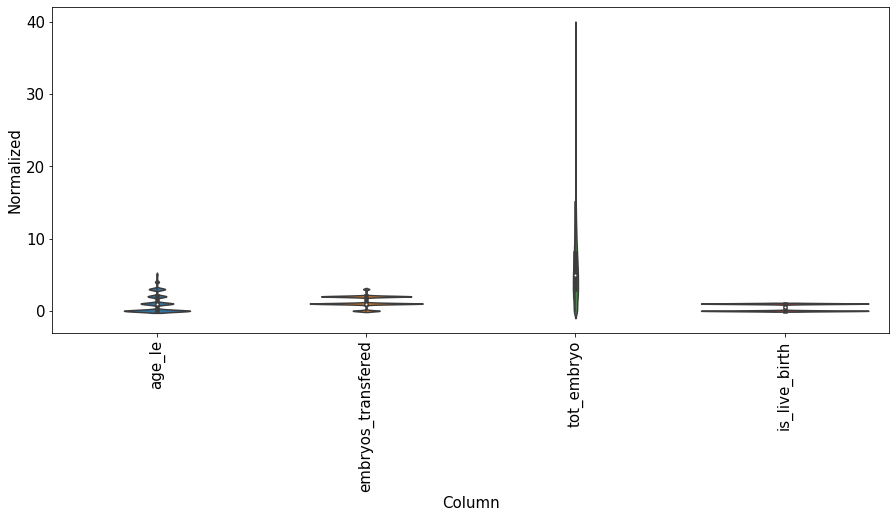

In [54]:
# standard scaling
def standard_scale(series):    
    return (series - series.mean()) / series.std()

normalization = False
# normalization = 'standard'
# normalization = 'minmax'

if normalization == 'minmax':
    df_ivf_balanced = (df_ivf_balanced - df_ivf_balanced.min())/(df_ivf_balanced.max()- df_ivf_balanced.min())
elif normalization == 'standard':
    df_ivf_balanced.embryos_transfered = standard_scale(df_ivf_balanced.embryos_transfered)
    df_ivf_balanced.tot_embryo = standard_scale(df_ivf_balanced.tot_embryo)
    df_ivf_balanced.fresh_egg_collected = standard_scale(df_ivf_balanced.fresh_egg_collected)
    df_ivf_balanced.total_egg_mixed = standard_scale(df_ivf_balanced.total_egg_mixed)
    df_ivf_balanced.eggs_mixed_partner_sperm = standard_scale(df_ivf_balanced.eggs_mixed_partner_sperm)
    df_ivf_balanced.eggs_mixed_partner_sperm = standard_scale(df_ivf_balanced.eggs_mixed_partner_sperm)
elif normalization == False:
    pass 

data = df_ivf_balanced.melt(var_name='Column', value_name='Normalized')
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=data)
ax.tick_params(axis='x', labelrotation=90)


## Train, test split

In [55]:
X = df_ivf_balanced.loc[:, df_ivf_balanced.columns!='is_live_birth']
y = df_ivf_balanced.loc[:,'is_live_birth']

## Modeling help functions

In [56]:
def plot_roc(y_test, probs):

    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores
    roc_auc_score = metrics.roc_auc_score(y_test, probs)
    # summarize scores
    print('ROC AUC=%.3f' % (roc_auc_score))
    # calculate roc curves
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    # get the best threshold
    J = tpr - fpr
    ix = np.nanargmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold ROC=%f' % (best_thresh))
    # plot the roc curve for the model
    plt.plot(fpr, tpr)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the plot
    plt.show()
    
    return best_thresh

In [57]:
def plot_precision_recall(y_test, probs):

    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate roc curves
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.nanargmax(fscore)
    best_thresh = thresholds[ix]
    print('Best Threshold precision_recall=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    # calculate scores
    pr_auc_score = metrics.auc(recall, precision)
    # summarize scores
    print('PR AUC=%.3f' % (pr_auc_score))
    # plot the roc curve for the model
    plt.plot(recall, precision, label='Model')
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.legend()
    plt.show()
    
    return best_thresh

In [58]:
def x_validate(model, X, y):
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    cv_results = cross_validate(model, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=cv, n_jobs=-1)
    # report performance
    print('Test accuracy: %.3f (%.3f)' % (np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy'])))
    print('Recall: %.3f (%.3f)' % (np.mean(cv_results['test_recall']), np.std(cv_results['test_recall'])))
    print('precision: %.3f (%.3f)' % (np.mean(cv_results['test_precision']), np.std(cv_results['test_precision'])))
    print('F1_score: %.3f (%.3f)' % (np.mean(cv_results['test_f1']), np.std(cv_results['test_f1'])))
    return cv_results

In [59]:
# cross validation function

def do_evaluate(model, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
    print(X_test)
    model.fit(X_train, y_train)
    # predict probabilities
    probs = model.predict_proba(X_test)
    print(X_test.iloc[0])
    print('predict for X_test0:', model.predict_proba(np.array(X_test.iloc[0]).reshape(1, -1)))
    # ROC AUC curve and score
    best_thresh_roc = plot_roc(y_test, probs)
    # Precision/Recall AUC curve and score
    best_thresh_pr = plot_precision_recall(y_test, probs)
    best_thresh = 0.5
#     best_thresh = best_thresh_pr
    # predict y_pred with best threshold based on ROC
    y_pred = (probs[:,1] >= best_thresh).astype('int')

    y_train_pred = model.predict(X_train)
    print('###### Performance of ', model.__class__.__name__, '######')
    print(f'Train accuracy: {metrics.accuracy_score(y_train, y_train_pred): .2f}')

    cm = metrics.confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure()
    disp.plot() 
    
    x_validate(model, X, y)


In [60]:
def do_feature_select(model, X, y):
    
    cv_results_all = []
    for i in range(2, X.shape[1]+1):
        print(f'###### number of feature selected: {i} ######')
        rfe = RFE(estimator = lr, n_features_to_select=i)
        pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
        # prepare the cross-validation procedure
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        # evaluate model
        cv_results = cross_validate(pipeline, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=cv, n_jobs=-1)        
        cv_results_all.append(cv_results)
        
        # fit RFE
        rfe.fit(X, y)
        # summarize all features
        for j in range(X.shape[1]):
            if rfe.support_[j] == True:
                print(f'column: {X.columns[j]}')
                print('--------')


    ax, fig = plt.subplots()
    fig.plot(range(2, X.shape[1]+1), [np.mean(cv_results_all[i]['test_f1']) for i in range(len(cv_results_all))])
    

In [61]:
def do_pca(model, X, y):
    
    cv_results_all = []
    for i in range(2, X.shape[1]+1):
        print(f'###### number of components: {i} ######')
        pca = PCA(n_components=i)
        pipeline = Pipeline(steps=[('pca', pca), ('m', model)])
        # prepare the cross-validation procedure
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        # evaluate model
        cv_results = cross_validate(pipeline, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=cv, n_jobs=-1)        
        cv_results_all.append(cv_results)
        
    ax, fig = plt.subplots()
    fig.plot(range(2, X.shape[1]+1), [np.mean(cv_results_all[i]['test_f1']) for i in range(len(cv_results_all))])

In [62]:
def do_calibration(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
    
    # uncalibrated 
    def uncalibrated(model, X_train, y_train, X_test):
    
        model.fit(X_train, y_train)
        # predict probabilities for the positive outcome only
        return model.predict_proba(X_test)[:,1]
    
    # calibrated 
    def calibrated(model, X_train, y_train, X_test):
        
        # define and fit calibration model
        calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv=5)
        calibrated_model.fit(X_train, y_train)
        # predict probabilities
        return calibrated_model, calibrated_model.predict_proba(X_test)[:, 1]
     
    # reliability diagram
    probs_uncal = uncalibrated(model, X_train, y_train, X_test)
    calibrated_model, probs_cal = calibrated(model, X_train, y_train, X_test)
    
    prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, probs_uncal, n_bins=10)
    print(f'Log loss - uncalibrated: {metrics.log_loss(y_test, probs_uncal):0.2f}')
    
    prob_true_cal, prob_pred_cal = calibration_curve(y_test, probs_cal, n_bins=10)
    print(f'Log loss - calibrated: {metrics.log_loss(y_test, probs_cal):0.2f}')
    
    plt.figure(figsize=(10, 5))
    # plot perfectly calibrated
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot model reliability
    plt.plot(prob_pred_uncal, prob_true_uncal, marker='.', label='uncalibrated')
    plt.plot(prob_pred_cal, prob_true_cal, marker='.', label='calibrated')
    plt.legend()
    plt.ylabel('Probability True')
    plt.xlabel('Probability Predicted')
    return calibrated_model

## Select what to do

In [63]:
feature_select = 0
pca = 0
calibration = 1
evaluate = 0

## Logistic regression

Log loss - uncalibrated: 0.62
Log loss - calibrated: 0.62


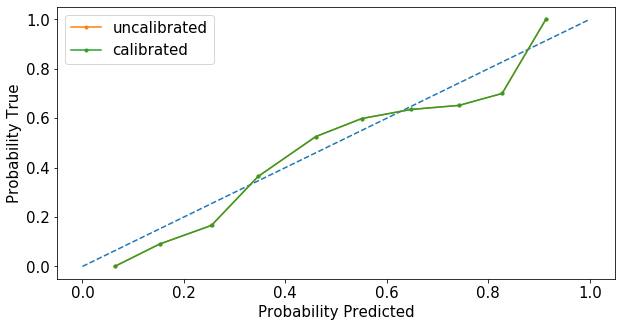

In [64]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=100)

if feature_select: 
    do_feature_select(lr, X, y)
elif pca:
    do_pca(lr, X, y)
elif evaluate:
    do_evaluate(lr, X, y)
elif calibration:
    calibrated_lr = do_calibration(lr, X, y)

## Decision Tree

Log loss - uncalibrated: 0.62
Log loss - calibrated: 0.58


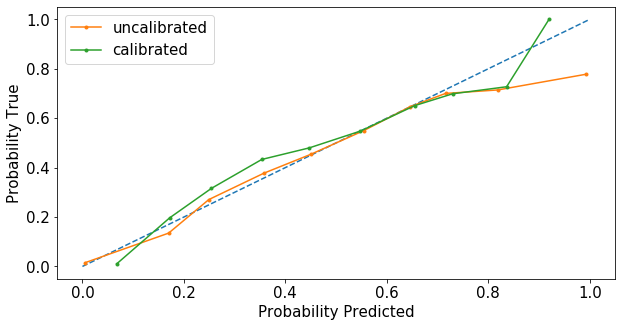

In [65]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10, random_state=100)

if feature_select: 
    do_feature_select(dtc, X, y)
elif pca:
    do_pca(dtc, X, y)
elif evaluate:
    do_evaluate(dtc, X, y)
elif calibration:
    calibrated_dtc = do_calibration(dtc, X, y)

## Random Forest

Log loss - uncalibrated: 0.56
Log loss - calibrated: 0.57


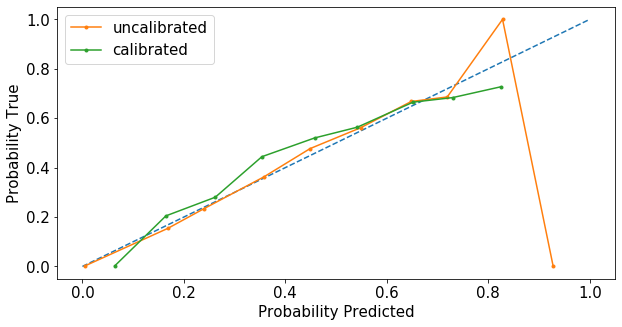

In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=500)

if feature_select: 
    do_feature_select(rfc, X, y)
elif pca:
    do_pca(rfc, X, y)
elif evaluate:
    do_evaluate(rfc, X, y)
elif calibration:
    calibrated_rfc = do_calibration(rfc, X, y)

## MLP 

Log loss - uncalibrated: 0.57
Log loss - calibrated: 0.58


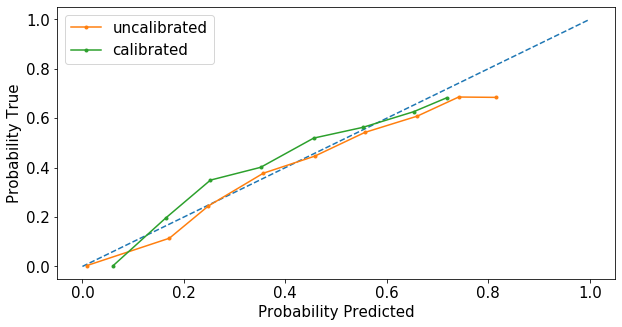

In [67]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(20, 10), activation="relu",random_state=100, max_iter=100)

if feature_select: 
    do_feature_select(mlpc, X, y)
elif pca:
    do_pca(mlpc, X, y)
elif evaluate:
    do_evaluate(mlpc, X, y)
elif calibration:
    calibrated_mlpc = do_calibration(mlpc, X, y)

Recall is the true positive rate. i.e. the percentage of those cycles with live birth that we have classified correctly. 

We have too many false positive (high false positive rate)... cases that didn't have live birth, what we predict them as having live birth. --> looks like the model is not doing a good job for class 0.

## Probability model

Find true underlying probability for a given input condition and then compare with the predicted probabilities from the models

In [68]:

# After IVF long 
# test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_collected':5, 'nr_prev_ivf':1,'total_egg_mixed':5, 
#         'embryos_transfered':2, 'eggs_mixed_partner_sperm':5,
#        'cause_male':0, 'cause_ovulatory':0, 'elec_single_embryo_trans':0,
#        'tot_embryo':5, 'sperm_source_le':1}


# After IVF short
# test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_collected':1, 'nr_prev_ivf':0,
#         'embryos_transfered':1, 'elec_single_embryo_trans':0,
#        'tot_embryo':1}


# After IVF RFE
test_dict = {'age_le':1,'embryos_transfered':2,'tot_embryo':3}


In [69]:
i=0

for key, value in test_dict.items():
    filter_idx = X.index[X[key]==value].tolist()
    if i == 0:
        filter_idx_common = filter_idx
    else:
        filter_idx_common = np.intersect1d(filter_idx, filter_idx_common)
    i += 1
    
# filtering
filter_X = X.loc[filter_idx_common]
filter_y = y.loc[filter_idx_common]

print(f'Found {len(filter_idx_common)} data samples')
print(f'True prob: {len(filter_y.loc[filter_y==1])/len(filter_y) * 100:0.02f}%')

Found 720 data samples
True prob: 52.22%


In [70]:
test = pd.Series(test_dict)

print(f'LR predicted prob: {lr.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
print(f'DT predicted prob: {dtc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
print(f'RF predicted prob: {rfc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
print(f'MLP predicted prob: {mlpc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')

LR predicted prob: 56.09%
DT predicted prob: 53.01%
RF predicted prob: 52.11%
MLP predicted prob: 53.02%


In [71]:
# Calibrated

In [72]:
test = pd.Series(test_dict)

print(f'LR predicted prob (calibrated): {calibrated_lr.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
print(f'DT predicted prob (calibrated): {calibrated_dtc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
print(f'RF predicted prob (calibrated): {calibrated_rfc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
print(f'MLP predicted prob (calibrated): {calibrated_mlpc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')

LR predicted prob (calibrated): 56.08%
DT predicted prob (calibrated): 51.16%
RF predicted prob (calibrated): 49.79%
MLP predicted prob (calibrated): 48.72%
